In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange
from skimage import measure
from classy import Class
from scipy.optimize import minimize, brentq, curve_fit
from scipy.integrate import cumtrapz
from scipy.interpolate import interp1d
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter
import scienceplots
plt.style.use('/home/gab/Desktop/JupiterNotebook_projects/neutrino_phase_shift_dir/mine.mplstyle')
#plt.style.use(['science','nature'])
plt.rcParams["axes.axisbelow"] = False

In [2]:
#reduced Plank mass
Mpl = 2.235e27

EDE = Class()

from classy import Class

# set scf params here
#K_scf = 3.93785
K_scf = 3.95
#phi_i_scf = 8.984555e-03
phi_i_scf = 6e-3

# Define parameters as a dictionary
params = {
    # Cosmological parameters
    'h': 0.6821,
    'A_s': 2.216e-9,
    'n_s': 0.9686,
    'omega_b': 0.02253,
    'omega_cdm': 0.1177,
    'tau_reio': 0.085,

    # Neutrinos and relativistic species
    #'N_ncdm': 1,
    'N_ur': 3.044,
    #'m_ncdm': 0.06,

    # Verbosity
    'input_verbose': 10,
    'background_verbose': 10,
    'perturbations_verbose': 1,

    # Dark energy and curvature
    'Omega_Lambda': 0.0,
    'Omega_fld': 0.0,
    'Omega_scf': -1, ## setting -1 tells class to set Omega0_scf = 1 - Sum_i Omega0_i

    # Scalar field (SCF) potential model
    'scf_potential': 'hilltop',
    # Scalar field (SCF) parameters
    'scf_parameters': '0.0,0.0,0.0,0.0,0.0,0.0', # just a dummy place holder for, filled w/ scf below by class
    'Lambda0_scf':1., ## we shoot for this value to fulfill the budget equation
    'K_scf':K_scf, # units of M_pl ^-1
    'phi_i_scf':phi_i_scf, # units of M_pl
    'scf_tuning_index': 1, ## this tunes V_0 in the potential to fulfill the bidget equation: V(chi) ~ V_0 (1 - 0.5 K^2 phi^2)
    'attractor_ic_scf': 'no',
}

EDE.set(params)

obs = {

    'output': '',

}

EDE.set(obs)

EDE.compute()
baM = EDE.get_background()

In [3]:
# General cosmology params
z = baM['z']
a = 1./(1. + z)
hEDE=EDE.h()
print(hEDE)
rho_crit = baM["(.)rho_crit"]
rho_b = baM["(.)rho_b"]
rho_cdm= baM["(.)rho_cdm"]
rho_m=rho_b+rho_cdm
rho_phi = baM["(.)rho_scf"]
p_phi = baM["(.)p_scf"]
phi_scf = baM["phi_scf"]
w_phi = p_phi/rho_phi
Omega_phi = rho_phi/rho_crit
Omega_m=rho_m/rho_crit
OmegaM_EDE=EDE.Omega_m()
OmegaL_EDE=EDE.Omega_Lambda()
print(Omega_m[-1])
print(OmegaL_EDE)

0.6821
0.30140106612645257
0.0


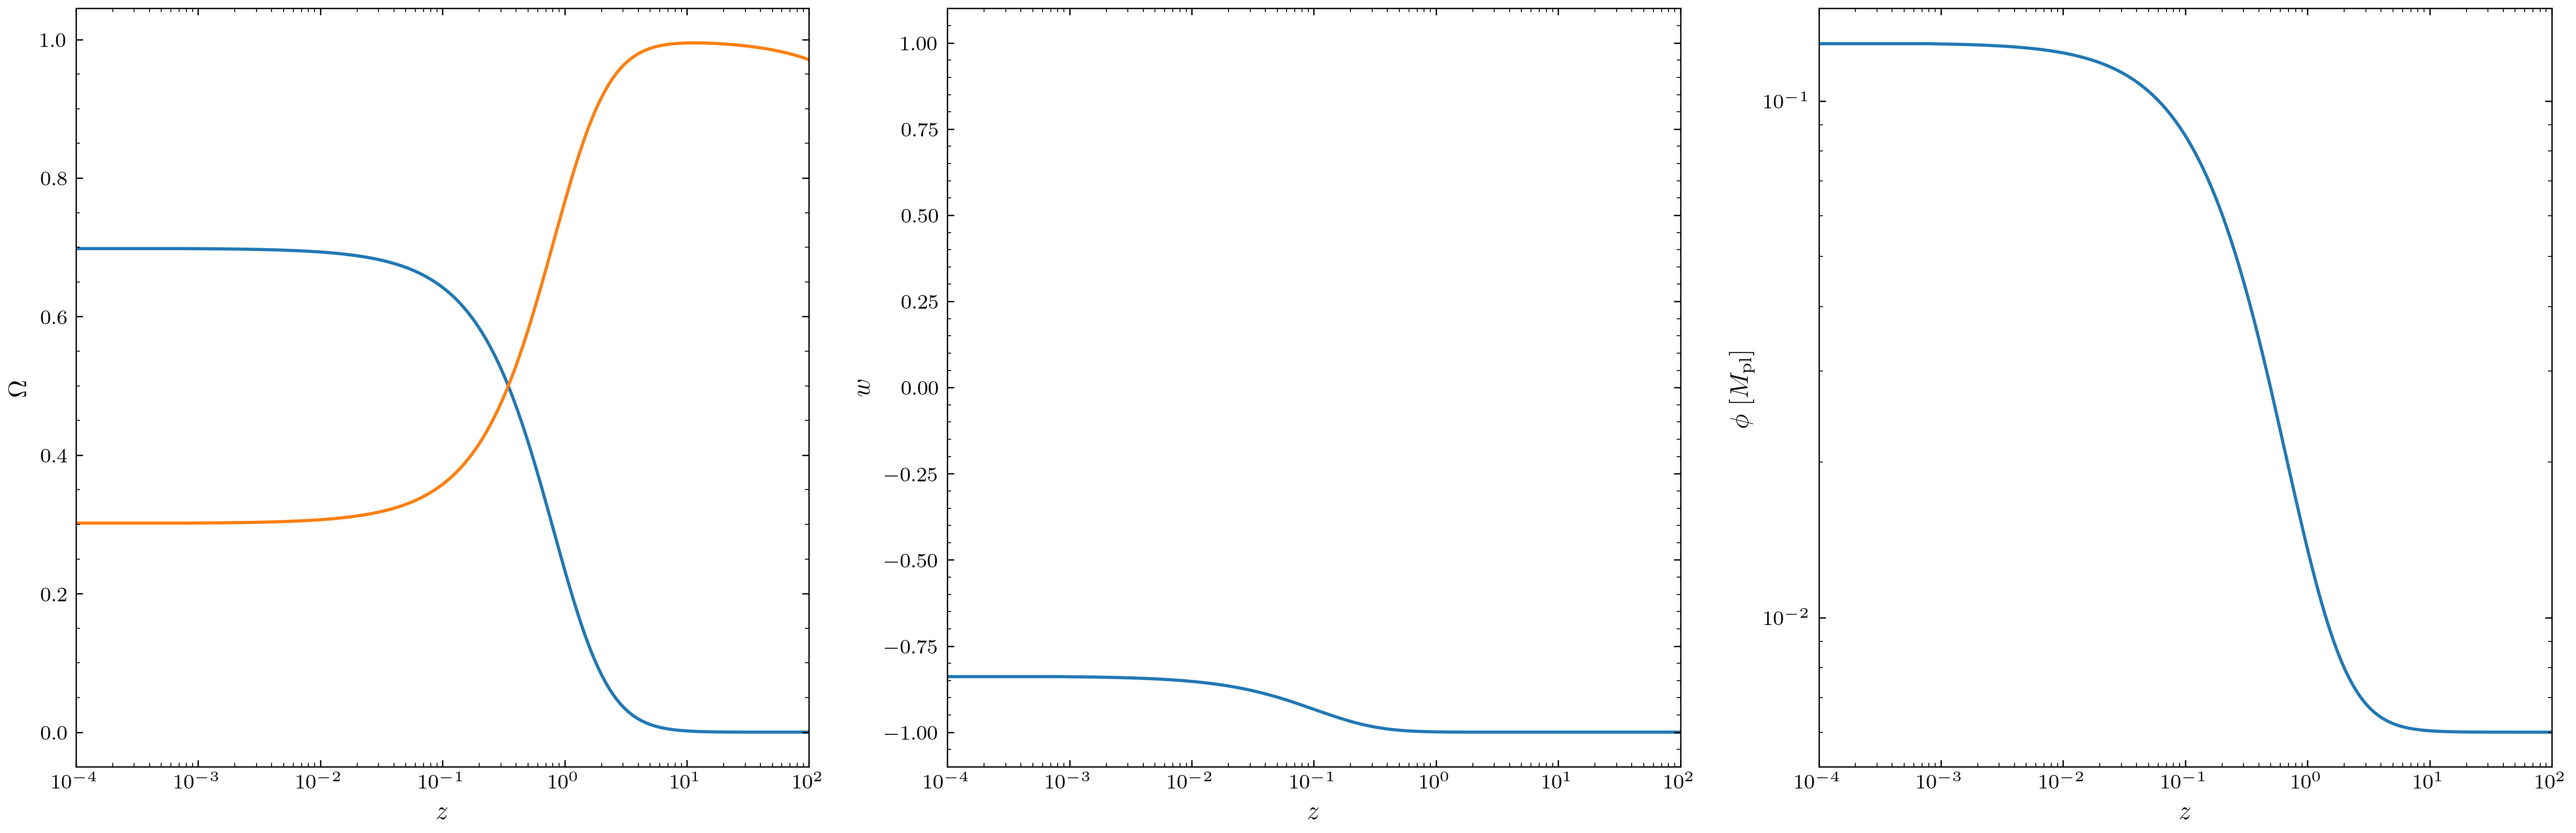

In [4]:
w0v=-1
wav=-2
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.semilogx(z,Omega_phi)
#plt.semilogx(z,OmegaDE_lcdm*(1+z)**(3 * (1 + w0v + wav)) *
#                   np.exp(-3 * wav * z / (1 + z)))
plt.semilogx(z,Omega_m)
#plt.semilogx(z, OmegaM_lcdm*np.ones(len(z)))
plt.ylabel(r'$\Omega$')
plt.xlabel(r'$z$')
plt.xlim([1e-4,1e2])
#plt.xlim([0.,4.])

plt.subplot(1,3,2)
plt.semilogx(z,w_phi)
plt.ylabel(r'$w$')
plt.xlabel(r'$z$')
plt.xlim([1e-4,1e2])
#plt.xlim([0.,4.])
plt.ylim([-1.1,1.1])

plt.subplot(1,3,3)
plt.loglog(z,phi_scf)
plt.ylabel(r'$\phi~[M_{\rm pl}]$')
plt.xlabel(r'$z$')
plt.xlim([1e-4,1e2])
#plt.xlim([0.,4.])

plt.tight_layout()

In [5]:
LCDM_settings = {  'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   'h':0.6821,
                   'omega_b':0.02253,
                   'omega_cdm':0.1177,
                   'A_s':2.216e-9, 
                   'n_s':0.9686,
                   'tau_reio':0.085,
                   #'m_ncdm': 0.06,
                   #'N_ncdm':1, 
                   'N_ur':3.044,
                   'l_max_scalars':3508,
                   'non linear':'HMcode',
                   'P_k_max_h/Mpc':100,
                   'z_max_pk':2.}

LCDM = Class()
LCDM.set(LCDM_settings)
LCDM.compute()
hLCDM=LCDM.h()
print(hLCDM)
OmegaDE_lcdm=LCDM.Omega_Lambda()
OmegaM_lcdm=LCDM.Omega_m()

0.6821


In [6]:
baLCDM=LCDM.get_background()
rho_b_lcdm = baLCDM["(.)rho_b"]
rho_cdm_lcdm= baLCDM["(.)rho_cdm"]
rho_m_lcdm=rho_b_lcdm+rho_cdm_lcdm
rho_crit_lcdm = baLCDM["(.)rho_crit"]
Omega_m_lcdm=rho_m_lcdm/rho_crit_lcdm

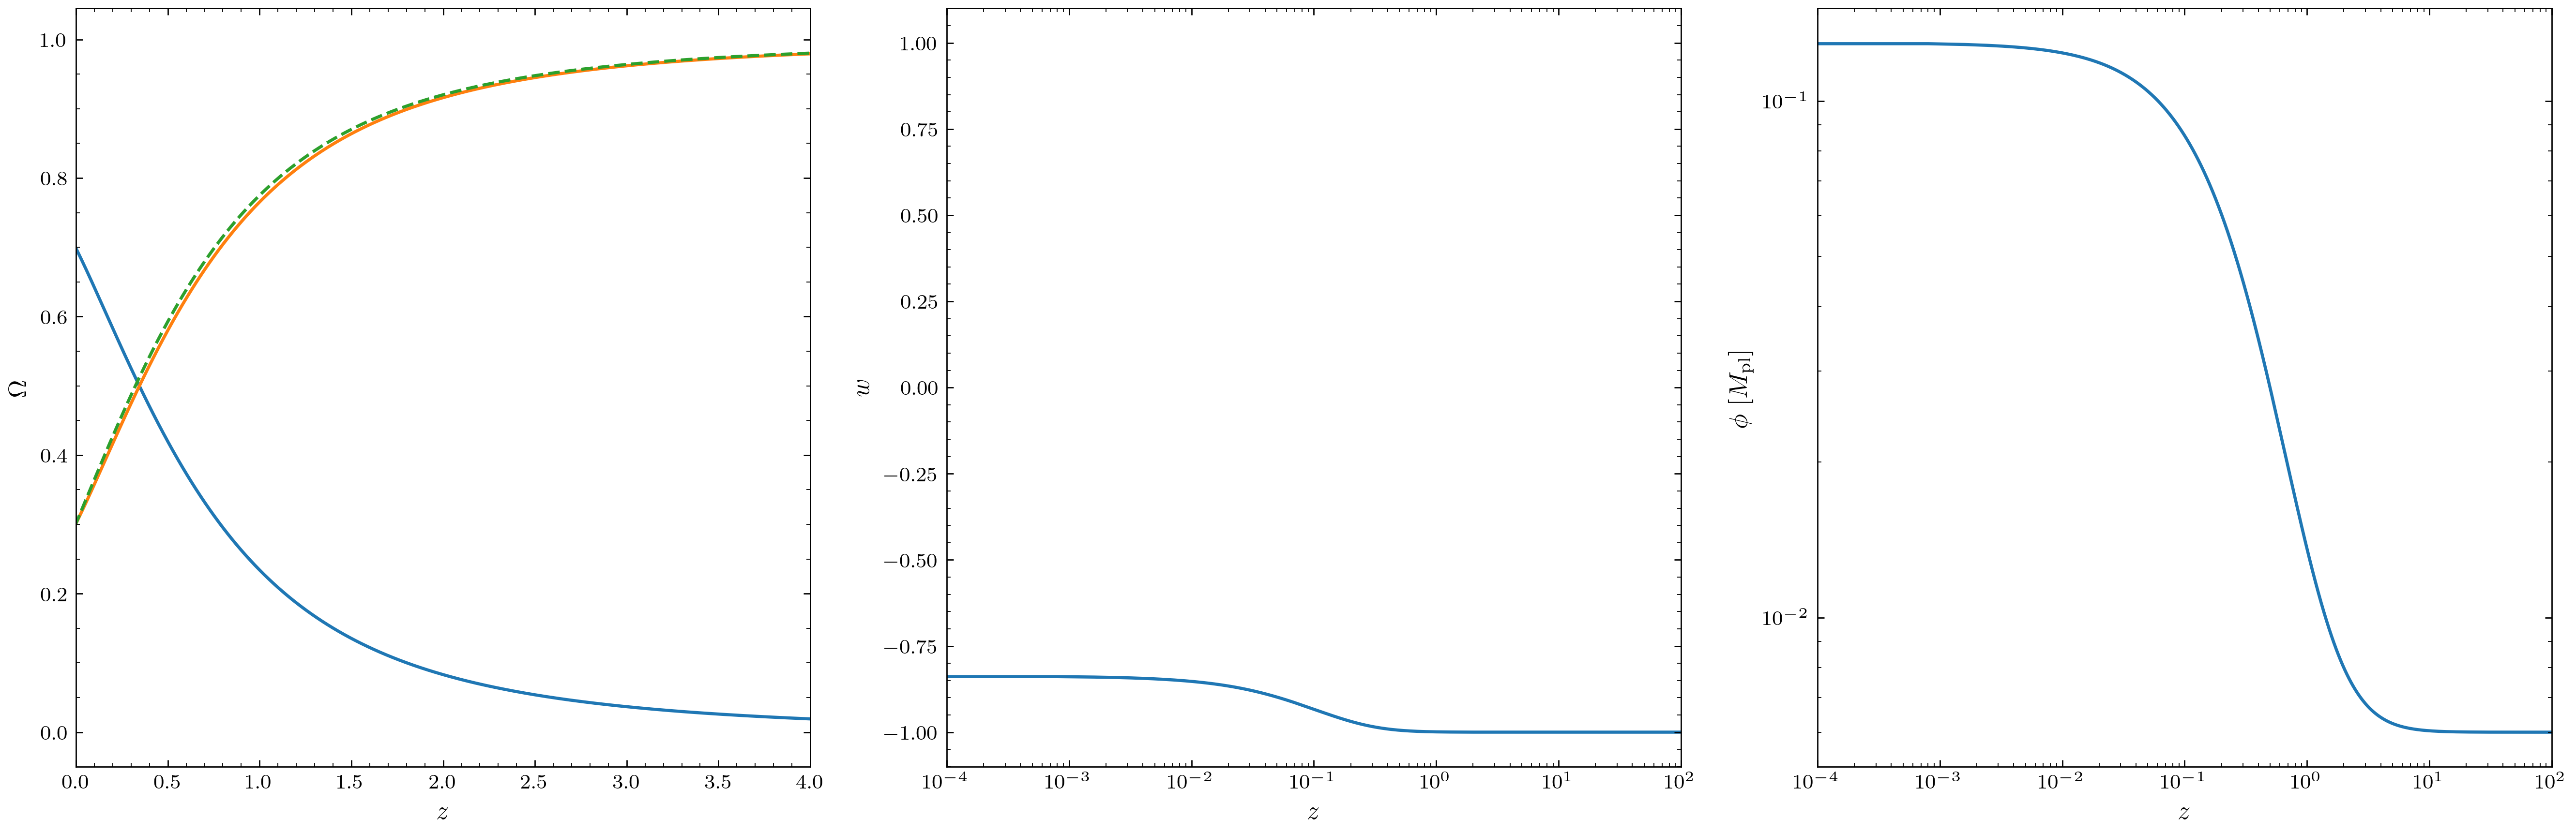

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
"""
plt.semilogx(z,Omega_phi)
plt.semilogx(z,Omega_m)
plt.semilogx(z, Omega_m_lcdm, ls='--')
"""
plt.plot(z,Omega_phi)
plt.plot(z,Omega_m)
plt.plot(z, Omega_m_lcdm, ls='--')
plt.ylabel(r'$\Omega$')
plt.xlabel(r'$z$')
#plt.xlim([1e-4,1e2])
plt.xlim([0.,4.])

plt.subplot(1,3,2)
plt.semilogx(z,w_phi)
plt.ylabel(r'$w$')
plt.xlabel(r'$z$')
plt.xlim([1e-4,1e2])
#plt.xlim([0.,4.])
plt.ylim([-1.1,1.1])

plt.subplot(1,3,3)
plt.loglog(z,phi_scf)
plt.ylabel(r'$\phi~[M_{\rm pl}]$')
plt.xlabel(r'$z$')
plt.xlim([1e-4,1e2])
#plt.xlim([0.,4.])

plt.tight_layout()

In [8]:
Hz_DE = np.vectorize(EDE.Hubble)(z)
DA_DE = np.vectorize(EDE.angular_distance)(z)
rs_DE = EDE.rs_drag()

DV_DE = ((1+z)**2 * DA_DE**2 * (z / Hz_DE))**(1/3)

# Finally, D_V / r_s
DV_over_rs = DV_DE / rs_DE

In [9]:
Hz_LCDM = np.vectorize(LCDM.Hubble)(z)
DA_LCDM = np.vectorize(LCDM.angular_distance)(z)
rs = LCDM.rs_drag()

DV_LCDM = ((1+z)**2 * DA_LCDM**2 * (z / Hz_LCDM))**(1/3)

# Finally, D_V / r_s
DV_over_rs_lcdm = DV_LCDM / rs

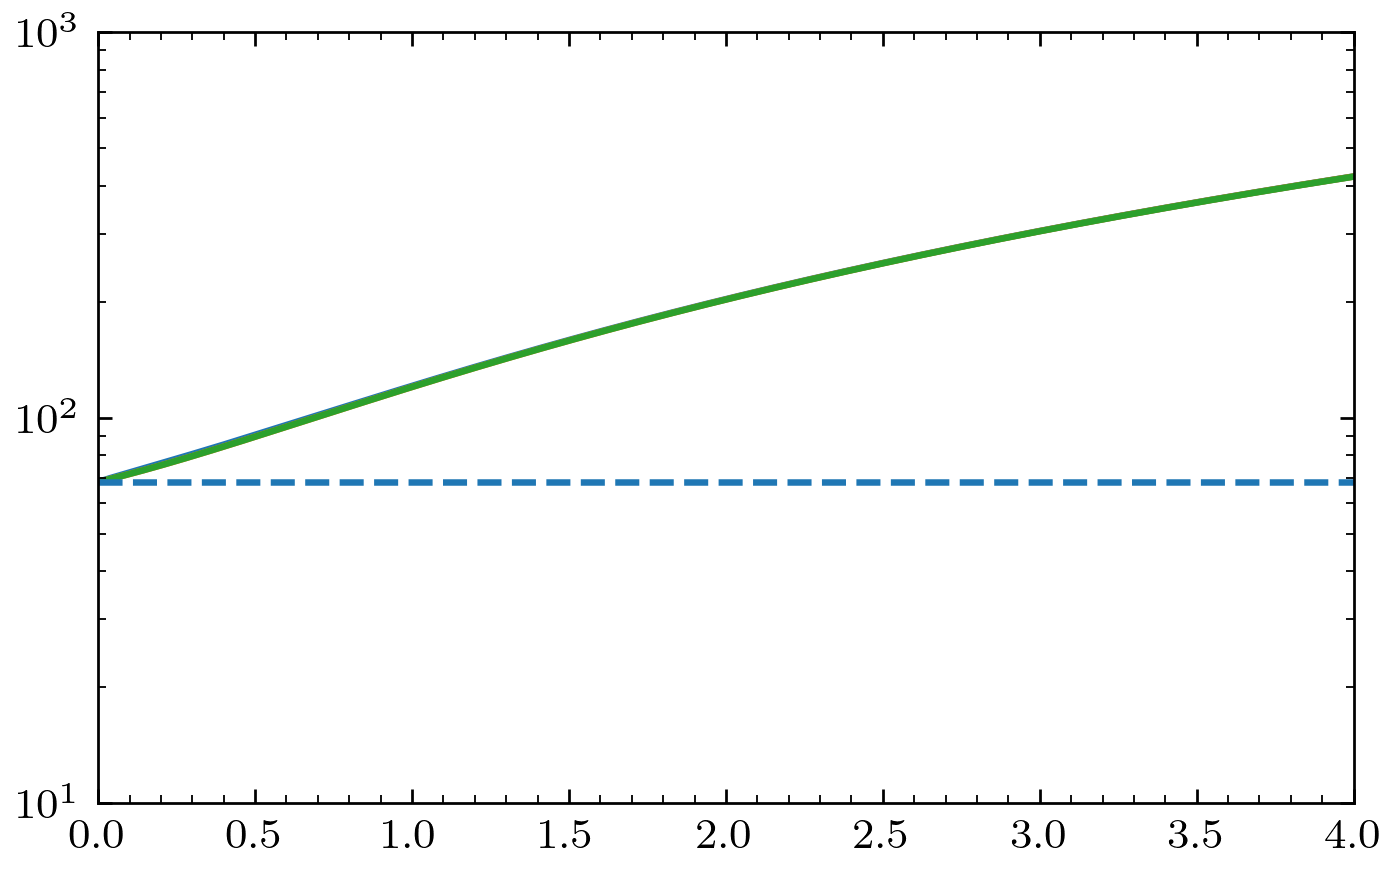

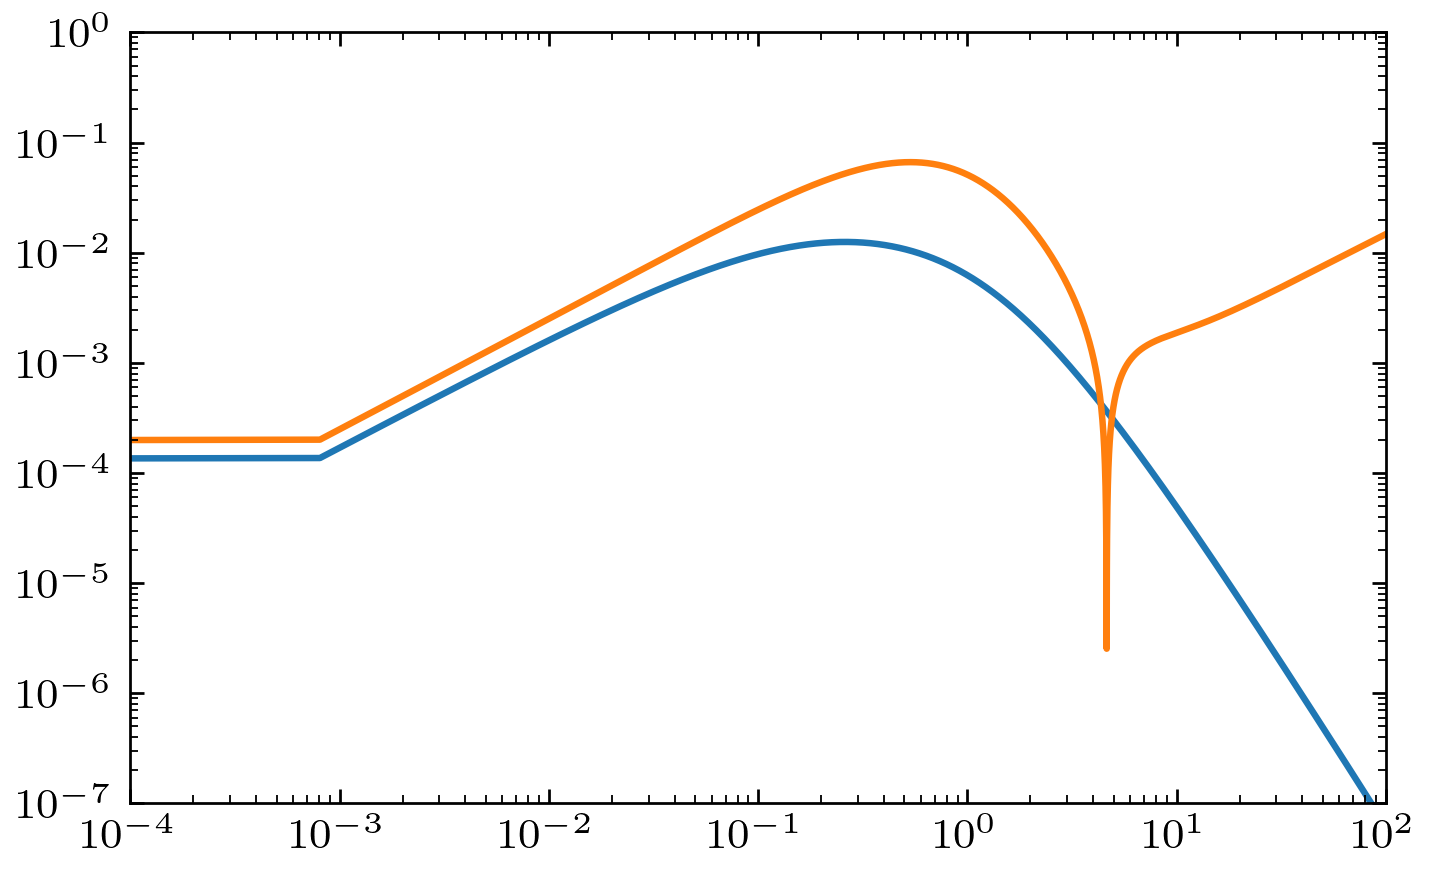

In [10]:
def H_z_func(z, w0, wa):
    H0=hLCDM*100
    Omega_m=OmegaM_lcdm
    Omega_Lambda = 1 - Omega_m
    E_z_squared = (Omega_m * (1 + z)**3 + 
                   Omega_Lambda * (1 + z)**(3 * (1 + w0 + wa)) *
                   np.exp(-3 * wa * z / (1 + z)))
    return H0 * np.sqrt(E_z_squared)
_c_in_km_s= 299792.458
plt.plot(z, Hz_DE*_c_in_km_s)
plt.plot(z,Hz_LCDM*_c_in_km_s)
plt.plot(z, H_z_func(z,-1,0))
plt.axhline(hLCDM*100,ls='--')
plt.xlim(0,4)
plt.yscale("log")
plt.ylim(1e1,1e3)
plt.show()
plt.plot(z, np.abs((Hz_DE-Hz_LCDM)/Hz_DE))
plt.plot(z, np.abs((H_z_func(z,-.6,-.7)/_c_in_km_s-Hz_DE)/Hz_DE))
plt.xlim(1e-4,1e2)
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-7,1)
plt.show()

In [11]:
mask = (z >= 0) & (z <= 4)
z_data = z[mask]  # redshift
z_binned = np.array([0.295,0.510,0.706,0.934,1.321,1.484,2.330])
DVrd_data_dr2_mean = np.array([7.944,12.720,16.048,19.720,24.256,26.059,31.267])
DVrd_data_dr2_std = np.array([0.075,0.098,0.110,0.091,0.174,0.400,0.256])
logz = np.log10(z)
Hz_interp = interp1d(logz, Hz_DE)
DA_interp=interp1d(logz,DA_DE)
wz_interp=interp1d(logz,w_phi)
Hz_data = Hz_interp(np.log10(z_data))*_c_in_km_s  # corresponding w_phi(z)
DA_data = DA_interp(np.log10(z_data))
Hz_binned= Hz_interp(np.log10(z_binned))*_c_in_km_s

/tmp/ipykernel_17033/2866781028.py:6: RuntimeWarning: divide by zero encountered in log10
  logz = np.log10(z)
/tmp/ipykernel_17033/2866781028.py:10: RuntimeWarning: divide by zero encountered in log10
  Hz_data = Hz_interp(np.log10(z_data))*_c_in_km_s  # corresponding w_phi(z)
/tmp/ipykernel_17033/2866781028.py:11: RuntimeWarning: divide by zero encountered in log10
  DA_data = DA_interp(np.log10(z_data))


In [12]:
def error_function(params, zs, Hs,Omega_m,H0,ws=None):
        w0_val, wa_val = params
        if ws==None:
            ws=np.ones(len(zs))
        # vectorised H_fit for all zs
        zp1 = 1.0 + zs
        E2 = (Omega_m * zp1**3 +
              (1 - Omega_m) *
              zp1**(3 * (1 + w0_val + wa_val)) *
              np.exp(-3 * wa_val * zs / zp1))
        Hfit = H0 * np.sqrt(E2)

        frac_err = np.abs((Hs - Hfit) / Hs)
        weighted_err = ws * frac_err
        return np.max(weighted_err)

In [41]:
n_samples = 50_000
w0_min, w0_max = -3.0, 1.0
wa_min, wa_max = -3.0, 2.0

# 1) draw the samples
w0_samples = np.random.uniform(w0_min, w0_max, size=n_samples)
wa_samples = np.random.uniform(wa_min, wa_max, size=n_samples)
param_samples = np.vstack([w0_samples, wa_samples]).T

In [57]:
st_time=time.time()
Err_grid=np.array([error_function(pars, z_data, Hz_data,OmegaM_lcdm,hLCDM*100) for pars in param_samples])
print(time.time()-st_time)

7.736140966415405


In [56]:
import multiprocessing as mp
import time
st_time=time.time()
def error_function_wrapper(args):
    params, zs, Hs, Omega_m, H0 = args
    return error_function(params, zs, Hs, Omega_m, H0)

n_cores = mp.cpu_count()  # or specify explicitly
with mp.Pool(processes=n_cores) as pool:
    args = [(pars, z_data, Hz_data,OmegaM_lcdm,hLCDM*100) for pars in param_samples]
    EH_sample_grid = np.array(pool.map(error_function_wrapper, args))
print(time.time()-st_time)

4.554352760314941


In [49]:
P_ij= 1/(Err_grid+1e-12)**2
P_ij /= P_ij.sum()
p_flat   = P_ij.ravel()
order    = np.argsort(p_flat)[::-1]   # indices that would sort p_flat descending
p_sorted = p_flat[order]

# 2) find the cutoff index where cumulative sum ≥ 0.95
cumsum   = np.cumsum(p_sorted)
cut_idx  = np.searchsorted(cumsum, 0.95)  
p_thresh = p_sorted[cut_idx]          # everything ≥ this value is in the 95% HPD

# 3) build a mask of the “inside‐HPD” bins
mask     = (P_ij >= p_thresh)

# 4) zero out everything outside and renormalize
P_hpd    = P_ij * mask
P_hpd   /= P_hpd.sum()

In [51]:
print(np.shape(P_ij))

(50000,)


In [47]:
N_draws = 100000
indices = np.random.choice(
    a = np.arange(len(P_hpd)),
    size = N_draws,
    replace = True,
    p = P_hpd
)
w0_draws = w0_samples[indices]
wa_draws = wa_samples[indices]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


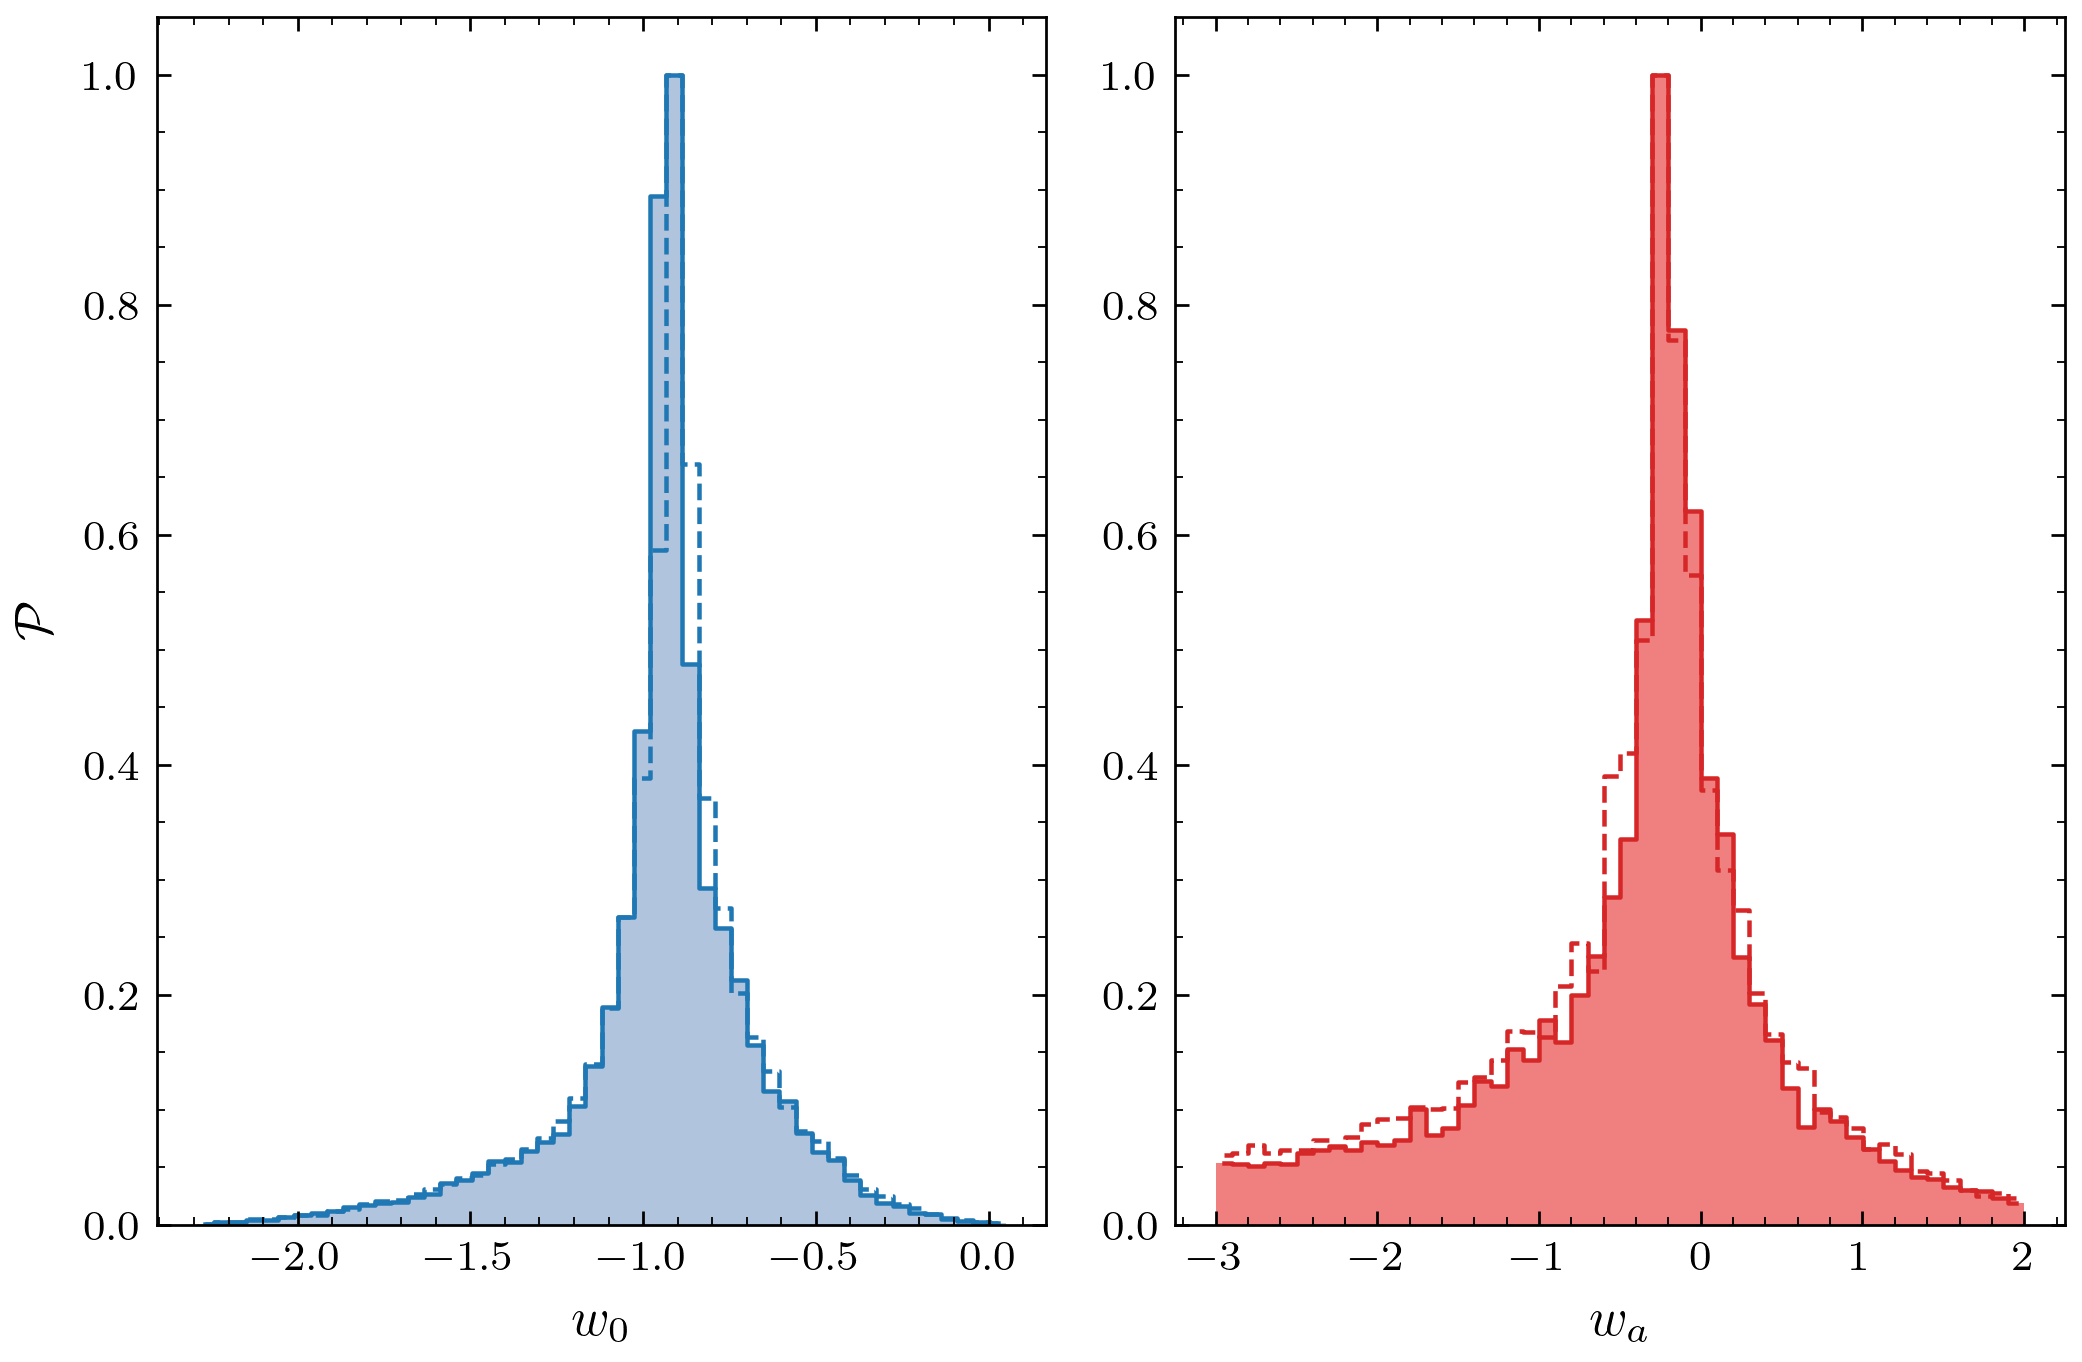

In [46]:
bins_w0 = 50
bins_wa = 50

# w0 histograms
counts0, edges0 = np.histogram(w0_draws,      bins=bins_w0)

# wa histograms
counts1, edges1 = np.histogram(wa_draws,      bins=bins_wa)

# 2) Normalize each to its own maximum
counts0_norm   = counts0   / counts0.max()
counts1_norm   = counts1   / counts1.max()

# 3) Compute bin‐centers
centers0 = (edges0[:-1] + edges0[1:]) * 0.5
centers1 = (edges1[:-1] + edges1[1:]) * 0.5

# 4) Plot
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(6,4))

# w0
ax0.bar(centers0, counts0_norm,    width=edges0[1]-edges0[0], color='lightsteelblue')
ax0.step(centers0, counts0_norm, where='mid', color='tab:blue', ls='-', lw=0.9)
ax0.step(centers0, counts0_norm1, where='mid', color='tab:blue', ls='--', lw=0.9)
ax0.set_xlabel(r'$w_0$')
ax0.set_ylabel(r'$\mathcal{P}$')
ax0.legend()

# wa
ax1.bar(centers1, counts1_norm,    width=edges1[1]-edges1[0], color='lightcoral')
ax1.step(centers1, counts1_norm, where='mid', color='tab:red',lw=0.9,ls='-')
ax1.step(centers1, counts1_norm1, where='mid', color='tab:red',lw=0.9,ls='--')
ax1.set_xlabel(r'$w_a$')

ax1.legend()

plt.tight_layout()
plt.show()

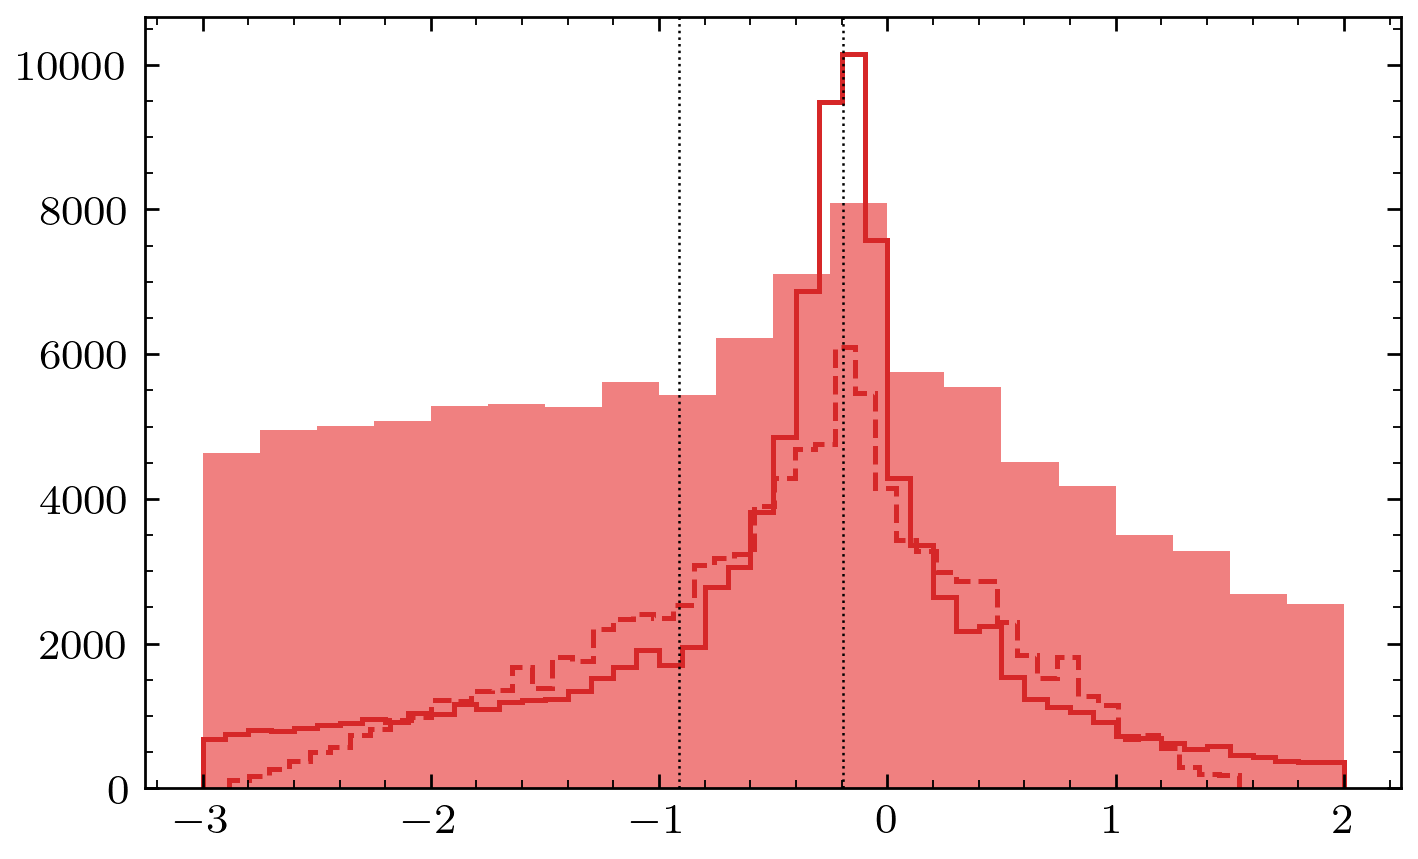

In [43]:
#plt.hist(w0_draws,  density=False,bins=50,color='lightsteelblue')
#plt.hist(w0_draws_v2,  density=False,bins=50,histtype='step',facecolor='none', edgecolor='tab:blue')
#plt.hist(w0_draws_filt,  density=False,bins=50,histtype='step',facecolor='none', edgecolor='tab:blue',ls='--')
plt.hist(wa_draws,  density=False,bins=20, color='lightcoral')
plt.hist(wa_draws_v2,  density=False,bins=50,histtype='step',facecolor='none', edgecolor='tab:red')
plt.hist(wa_draws_filt,  density=False,bins=50,histtype='step',facecolor='none', edgecolor='tab:red',ls='--')
plt.axvline(w0_bf,ls=':',lw=0.5,c='k')
plt.axvline(wa_bf,ls=':',lw=0.5,c='k')


In [15]:
popt0, cov0=curve_fit(H_fit_func, z_data, Hz_data, p0=(-1, -0.2))
popt0_binned, cov0_binned=curve_fit(H_fit_func, z_binned, Hz_binned, p0=(-1, -0.2))
popt0_binned_adj, cov0_binned_adj=curve_fit(H_fit_func, z_binned, Hz_binned, sigma=DVrd_data_dr2_std, absolute_sigma=False, p0=(-1, -0.2))
print(popt0, np.sqrt(np.diagonal(cov0)))
print(popt0_binned, np.sqrt(np.diagonal(cov0_binned)))
print(popt0_binned_adj, np.sqrt(np.diagonal(cov0_binned_adj)))

[-0.94108903 -0.09472317] [0.00053584 0.00155015]
[-0.93583652 -0.1205709 ] [0.00679503 0.02262232]
[-0.92436728 -0.16860762] [0.00665703 0.02741144]


-0.9123427725460904 -0.19498262486019416
-0.9217644269030106 -0.1713313384519294
-0.9180604865539881 -0.171538814045108


In [18]:
w0_bf_v2, wa_bf_v2, Err_bf_v2,_,_ = find_w0_wa_min_l2_err(z_data, Hz_data, hLCDM*100, OmegaM_lcdm)
w0_bf_binned_v2, wa_bf_binned_v2, Err_bf_binned_v2, _, _ = find_w0_wa_min_l2_err(z_binned, Hz_binned, hLCDM*100, OmegaM_lcdm)
print(w0_bf_v2, wa_bf_v2)
print(w0_bf_binned_v2, wa_bf_binned_v2)
print(w0_bf, wa_bf)
print(w0_bf_binned, wa_bf_binned)

-0.9315257457915523 -0.12947098065563378
-0.9337020493846674 -0.13074626554137686
-0.9123427725460904 -0.19498262486019416
-0.9217644269030106 -0.1713313384519294


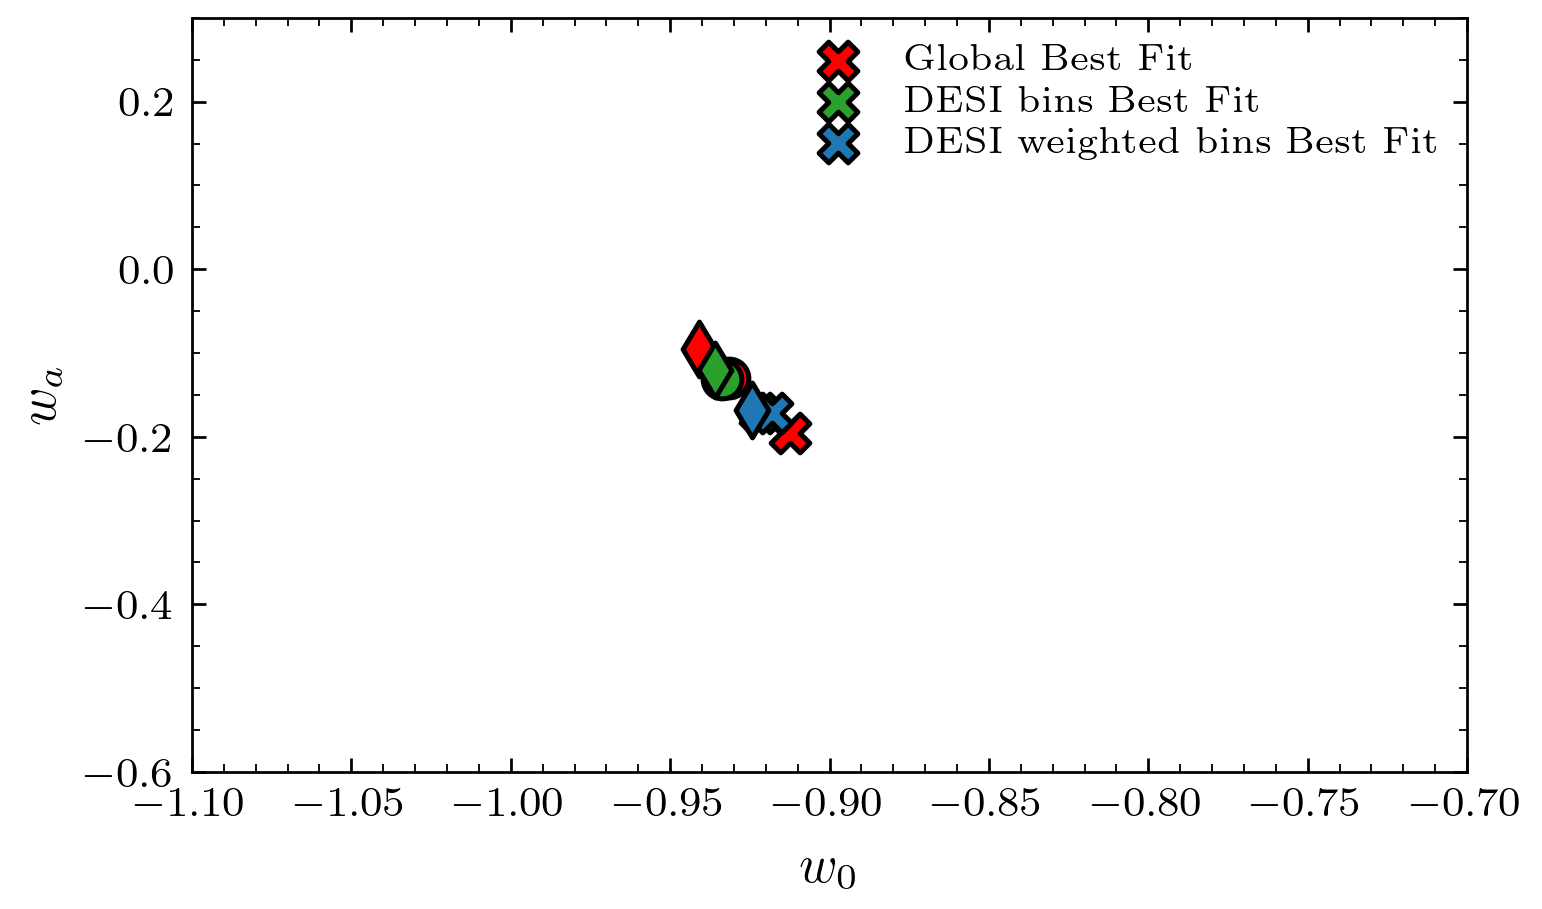

In [19]:
fig, ax = plt.subplots()
ax.set_xlim(-1.1,-0.7)
ax.set_ylim(-0.6,0.3)
ax.scatter(w0_bf, wa_bf,marker='X', c='red', s=60,edgecolor='k', linewidth=1,zorder=1.5,label='Global Best Fit')
ax.scatter(w0_bf_binned, wa_bf_binned,marker='X', c='tab:green', s=60,edgecolor='k', linewidth=1,zorder=1.5, label='DESI bins Best Fit') 
ax.scatter(w0_bf_binned_adj, wa_bf_binned_adj,marker='X', c='tab:blue', s=60,edgecolor='k', linewidth=1,zorder=1.5,  label='DESI weighted bins Best Fit')

ax.scatter(w0_bf_v2, wa_bf_v2,marker='o', c='red', s=60,edgecolor='k', linewidth=1,zorder=1.5)
ax.scatter(w0_bf_binned_v2, wa_bf_binned_v2,marker='o', c='tab:green', s=60,edgecolor='k', linewidth=1,zorder=1.5) 

ax.scatter(popt0[0], popt0[1],marker='d', c='red', s=60,edgecolor='k', linewidth=1,zorder=1.5)
ax.scatter(popt0_binned[0], popt0_binned[1],marker='d', c='tab:green', s=60,edgecolor='k', linewidth=1,zorder=1.5) 
ax.scatter(popt0_binned_adj[0], popt0_binned_adj[1],marker='d', c='tab:blue', s=60,edgecolor='k', linewidth=1,zorder=1.5)



ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_a$')
ax.legend()
plt.tight_layout()
plt.show()

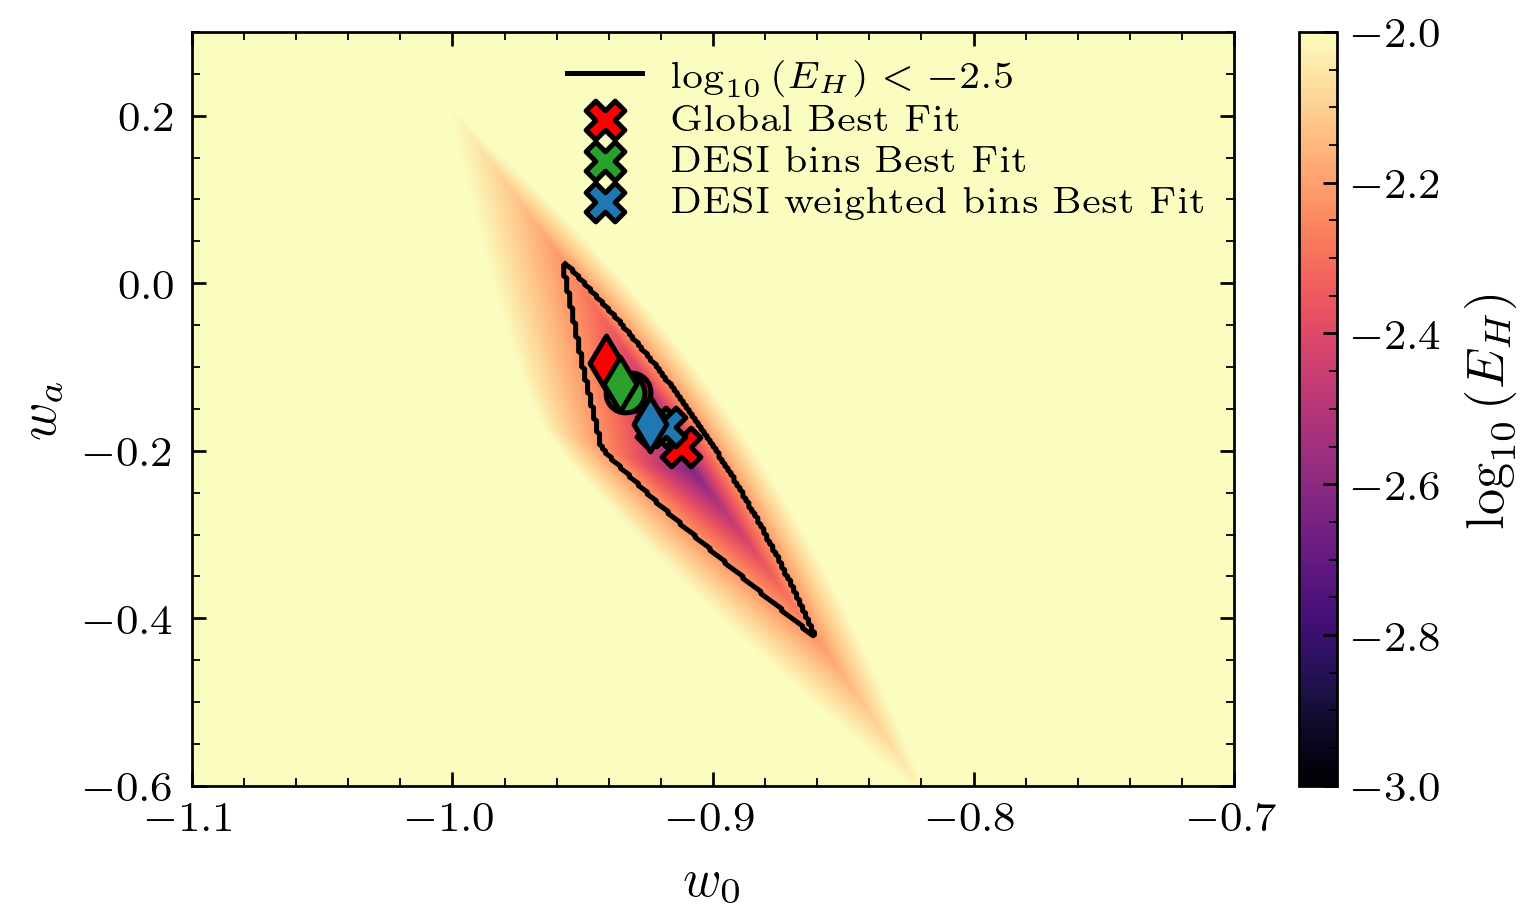

In [20]:
fig, ax = plt.subplots()
# plot the error heatmap with fixed vmin/vmax
im = ax.imshow(np.log10(Err_grid), origin='lower',
               extent=[w0_arr.min(), w0_arr.max(),
                       wa_arr.min(), wa_arr.max()],
               aspect='auto', cmap='magma',
               vmin=-3, vmax=-2)
plt.colorbar(im, ax=ax, label=r'$\log_{10}\left(E_H\right)$')

# overlay the threshold contour(s)
for i in range(len(boundaries)):
    contour=boundaries[i]
    if i==0:
        ax.plot(contour[:,0], contour[:,1], 'k-', lw=1.,zorder=1,label=r'$\log_{10}\left(E_H\right)<-2.5$')
    else:
        ax.plot(contour[:,0], contour[:,1], 'k-', lw=1.,zorder=1)
ax.set_xlim(-1.1,-0.7)
ax.set_ylim(-0.6,0.3)
ax.scatter(w0_bf, wa_bf,marker='X', c='red', s=60,edgecolor='k', linewidth=1,zorder=1.5,label='Global Best Fit')
#ax.errorbar(w0_bf, wa_bf,yerr=wa_bf_err, xerr=w0_bf_err, marker='x', c='red', markersize=3, elinewidth=.5,zorder=1.5,label='Global Best Fit')
ax.scatter(w0_bf_binned, wa_bf_binned,marker='X', c='tab:green', s=60,edgecolor='k', linewidth=1,zorder=1.5, label='DESI bins Best Fit') 
ax.scatter(w0_bf_binned_adj, wa_bf_binned_adj,marker='X', c='tab:blue', s=60,edgecolor='k', linewidth=1,zorder=1.5,  label='DESI weighted bins Best Fit')
ax.scatter(w0_bf_v2, wa_bf_v2,marker='o', c='red', s=60,edgecolor='k', linewidth=1,zorder=1.5)
ax.scatter(w0_bf_binned_v2, wa_bf_binned_v2,marker='o', c='tab:green', s=60,edgecolor='k', linewidth=1,zorder=1.5) 

ax.scatter(popt0[0], popt0[1],marker='d', c='red', s=60,edgecolor='k', linewidth=1,zorder=1.5)
ax.scatter(popt0_binned[0], popt0_binned[1],marker='d', c='tab:green', s=60,edgecolor='k', linewidth=1,zorder=1.5) 
ax.scatter(popt0_binned_adj[0], popt0_binned_adj[1],marker='d', c='tab:blue', s=60,edgecolor='k', linewidth=1,zorder=1.5)

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_a$')
ax.legend()
plt.tight_layout()
plt.show()

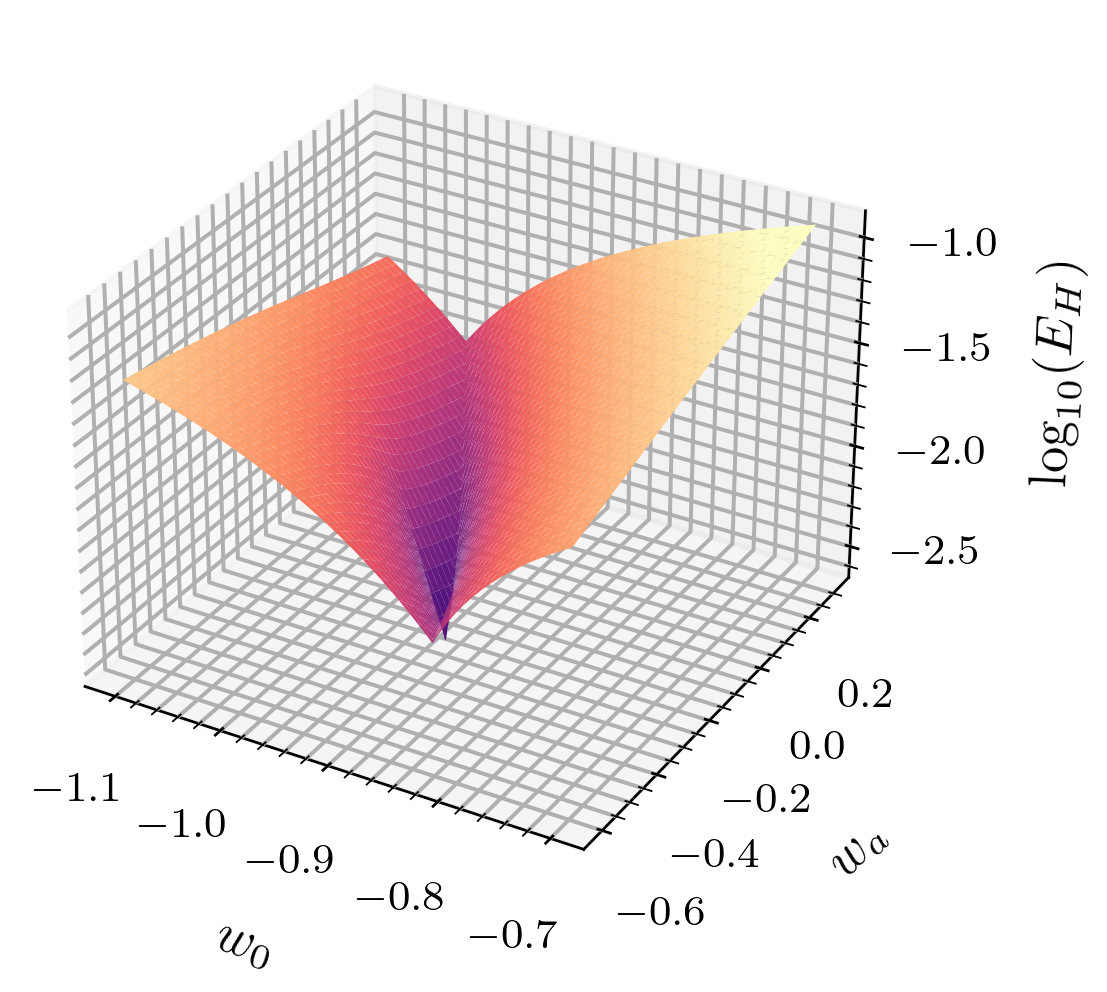

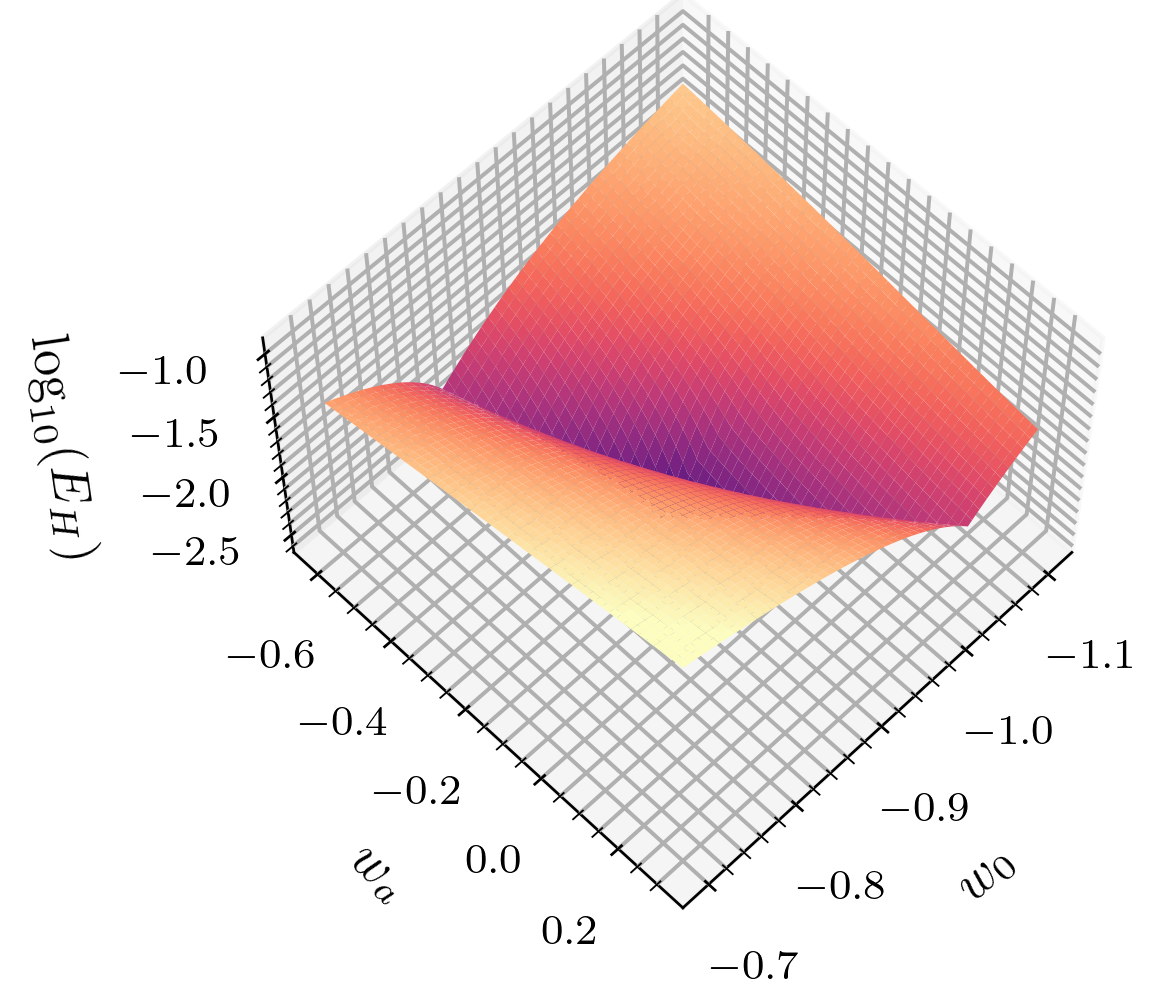

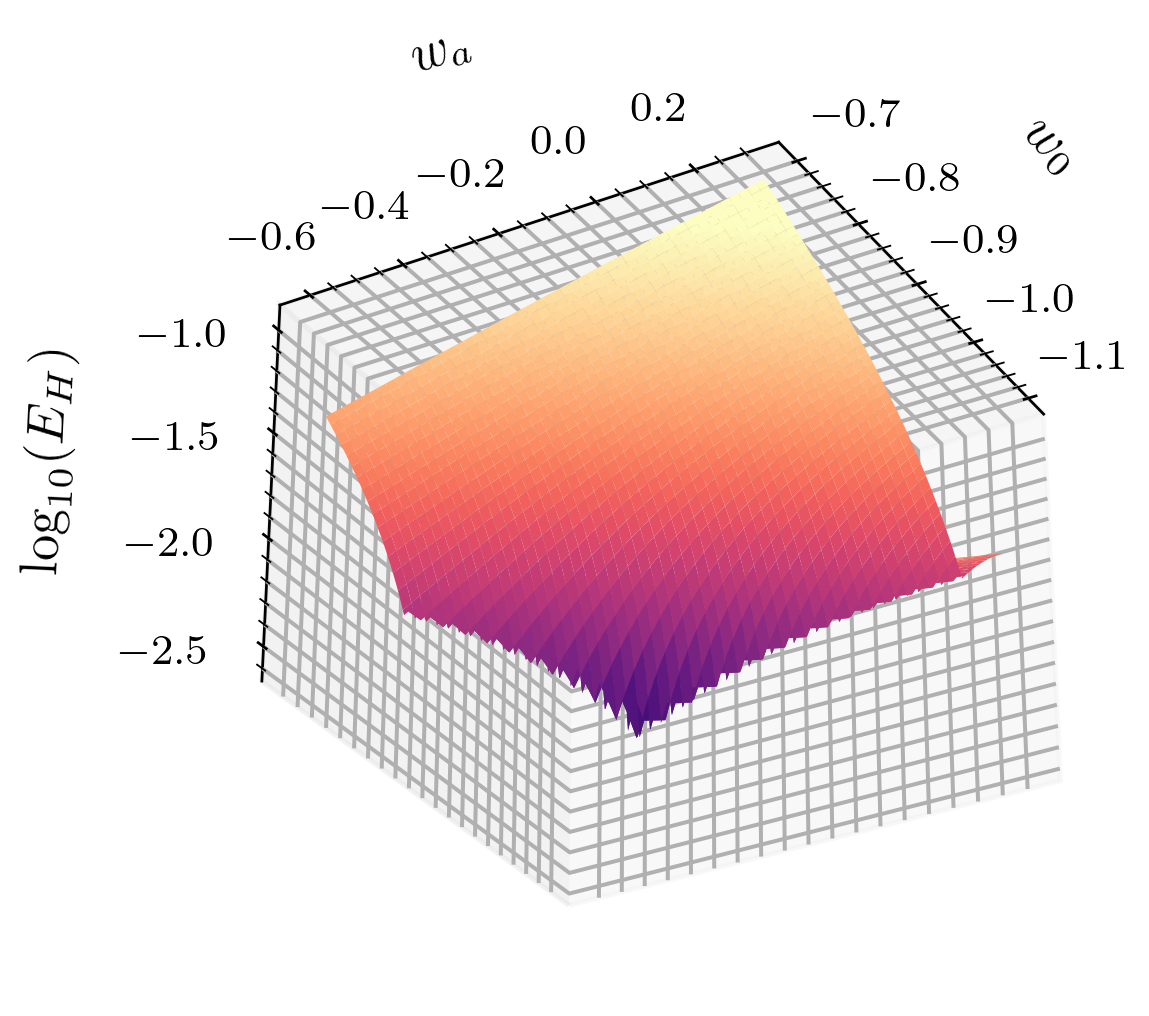

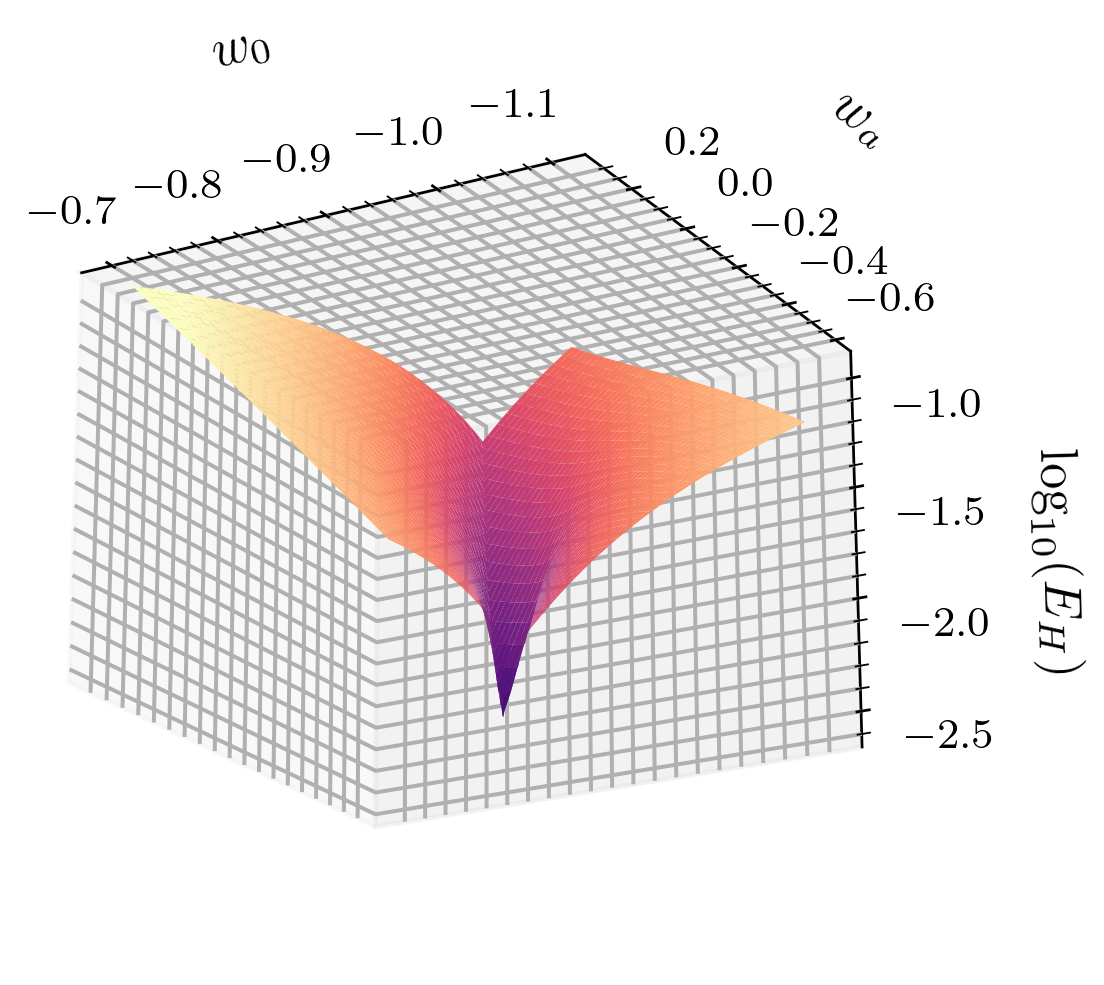

In [28]:
W0, WA = np.meshgrid(w0_arr, wa_arr)

# take log10 if you like
Z = np.log10(Err_grid)

views = [
    (30,  -60),   # front-right, low
    (60,   45),   # top-down
    (-30,  30),   # bottom-front
    (-20, 120)    # bottom-side
]


for elev, azim in views:
    fig = plt.figure()
    ax  = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(
        W0, WA, Z,
        cmap='magma',
        vmin=-3, vmax=-1,
        edgecolor='none',
        antialiased=True
    )
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel(r'$w_0$')
    ax.set_ylabel(r'$w_a$')
    ax.set_zlabel(r'$\log_{10}(E_H)$')
    plt.tight_layout()
    plt.show()

In [166]:
def wz_func(zs, w0, wa):
    return w0 + wa * (1 - 1 / (1 + zs))

popt, pcov = curve_fit(wz_func, z_data, wz_interp(np.log10(z_data)), p0=(-1, 0))  # initial guess w0=-1, wa=0
w0_bf_v2, wa_bf_v2 = popt
popt_bin, pcov_bin = curve_fit(wz_func, z_binned, wz_interp(np.log10(z_binned)), p0=(-1, 0))
w0_bf_binned_v2, wa_bf_binned_v2 = popt_bin
popt_bin_adj, pcov_bin = curve_fit(wz_func, z_binned, wz_interp(np.log10(z_binned)), p0=(-1, 0), sigma=DVrd_data_dr2_std,  absolute_sigma=False)
w0_bf_binned_adj_v2, wa_bf_binned_adj_v2 = popt_bin_adj

/tmp/ipykernel_908175/168583998.py:4: RuntimeWarning: divide by zero encountered in log10
  popt, pcov = curve_fit(wz_func, z_data, wz_interp(np.log10(z_data)), p0=(-1, 0))  # initial guess w0=-1, wa=0


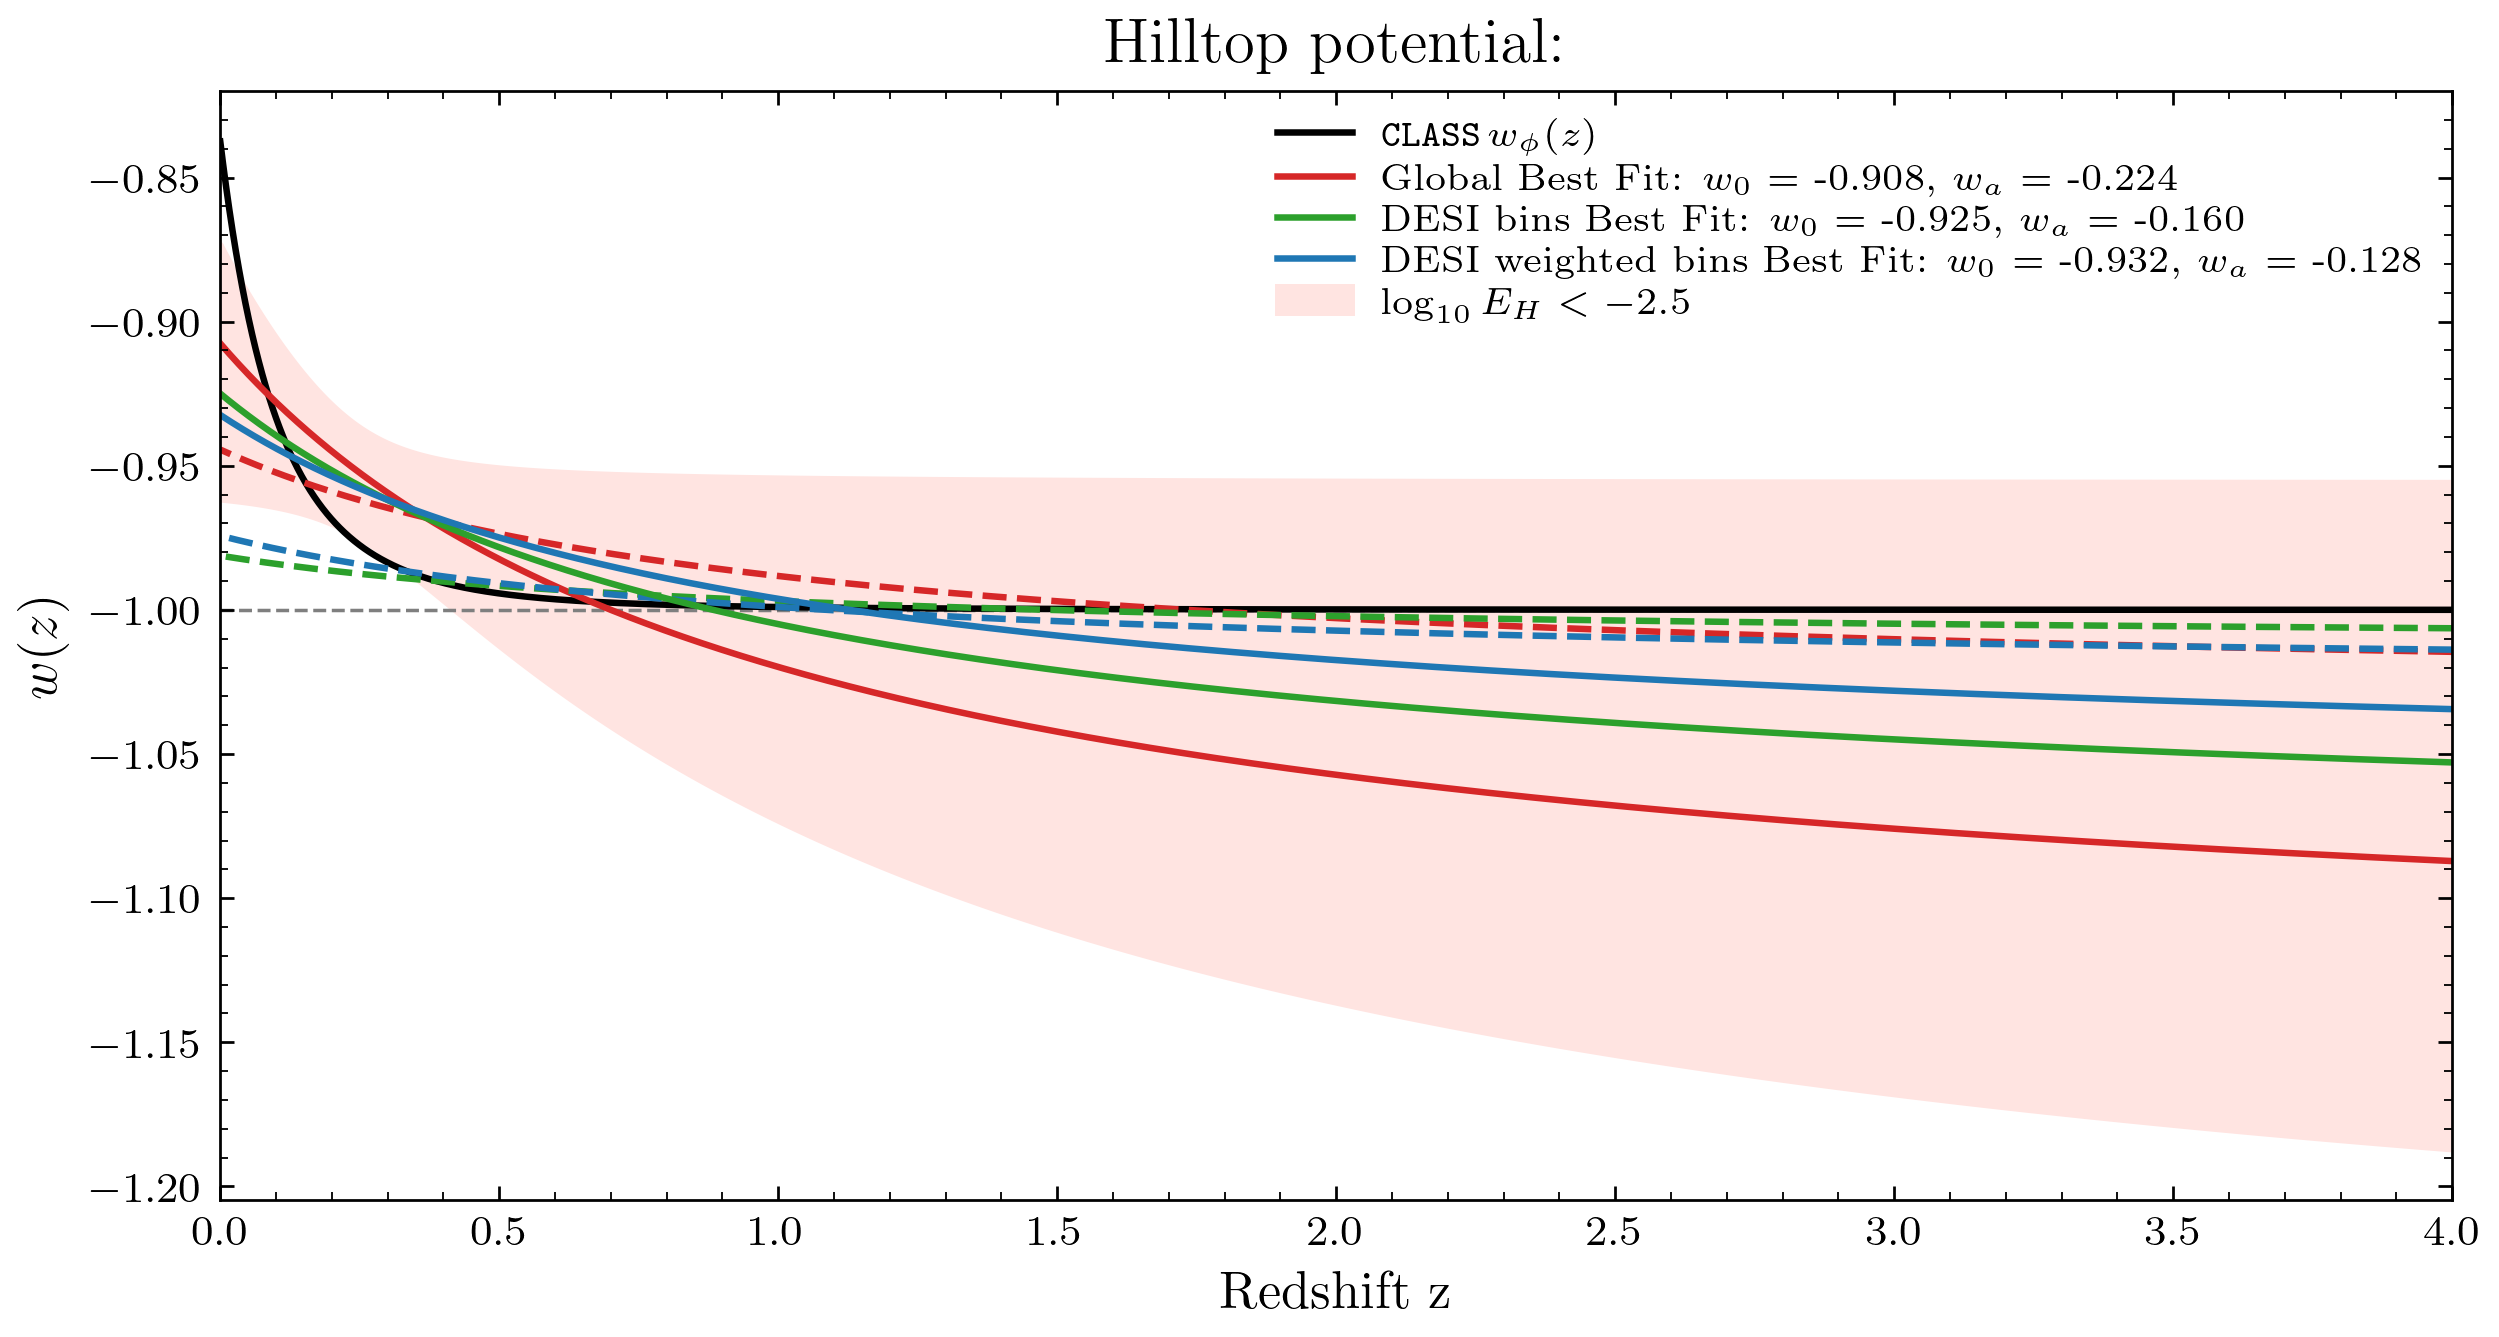

In [169]:

    
WA, W0 = np.meshgrid(wa_arr, w0_arr, indexing='ij')  # (N_wa,N_w0)
valid_w0 = W0[mask]     # 1D array of all w0 inside the contour
valid_wa = WA[mask]     # same length, parallel array of wa
# 2) randomly sample 1 000 points (with replacement)
n_samp = 1000
idx    = np.random.choice(len(valid_w0), size=n_samp, replace=True)
w0_samp = valid_w0[idx]
wa_samp = valid_wa[idx]


# 4) build an array (1000 × 200) of all w(z) curves
#    broadcasting: w0_samp[:,None] + wa_samp[:,None]*a_factor[None,:]
w_z = w0_samp[:, None] + wa_samp[:, None] * (1 - 1 / (1 + z_data[None, :])) 
w_z_mean =np.mean(w_z, axis=0)
w_z_std=np.std(w_z, axis=0)
w_z_2psigma=w_z_mean+2*w_z_std
w_z_2msigma=w_z_mean-2*w_z_std
# 5) plot
plt.figure(figsize=(8,4))
"""
for curve in w_z:
    plt.plot(z_data, curve, color='gray', alpha=0.03)
"""
plt.fill_between(z_data,w_z_2psigma,w_z_2msigma,alpha=1,color='mistyrose',label=r'$\log_{10}E_H<-2.5$')
plt.axhline(-1,ls='--',c='tab:gray',lw=0.7)
plt.plot(baM['z'], w_phi, label=r'$\texttt{CLASS}\,w_\phi(z)$',c='k')
plt.plot(z_data, wz_func(z_data, w0_bf,wa_bf) , '-', label=f'Global Best Fit: $w_0$ = {w0_bf:.3f}, $w_a$ = {wa_bf:.3f}',c='tab:red')
plt.plot(z_data, wz_func(z_data, w0_bf_v2,wa_bf_v2) , '--',c='tab:red')
plt.plot(z_data, wz_func(z_data, w0_bf_binned_v2,wa_bf_binned_v2) , '--',c='tab:green')
plt.plot(z_data, wz_func(z_data, w0_bf_binned_adj_v2,wa_bf_binned_adj_v2) , '--',c='tab:blue')

plt.plot(z_data, wz_func(z_data, w0_bf_binned,wa_bf_binned) , '-', label=f'DESI bins Best Fit: $w_0$ = {w0_bf_binned:.3f}, $w_a$ = {wa_bf_binned:.3f}',c='tab:green')
plt.plot(z_data, wz_func(z_data, w0_bf_binned_adj,wa_bf_binned_adj) , '-', label=f'DESI weighted bins Best Fit: $w_0$ = {w0_bf_binned_adj:.3f}, $w_a$ = {wa_bf_binned_adj:.3f}',c='tab:blue')
plt.xlabel('Redshift z')
plt.ylabel(r'$w(z)$')
plt.legend(loc='upper right')

plt.xlim([0,4])
#plt.ylim([-1.08,-0.90])
plt.title('Hilltop potential:')
plt.show()

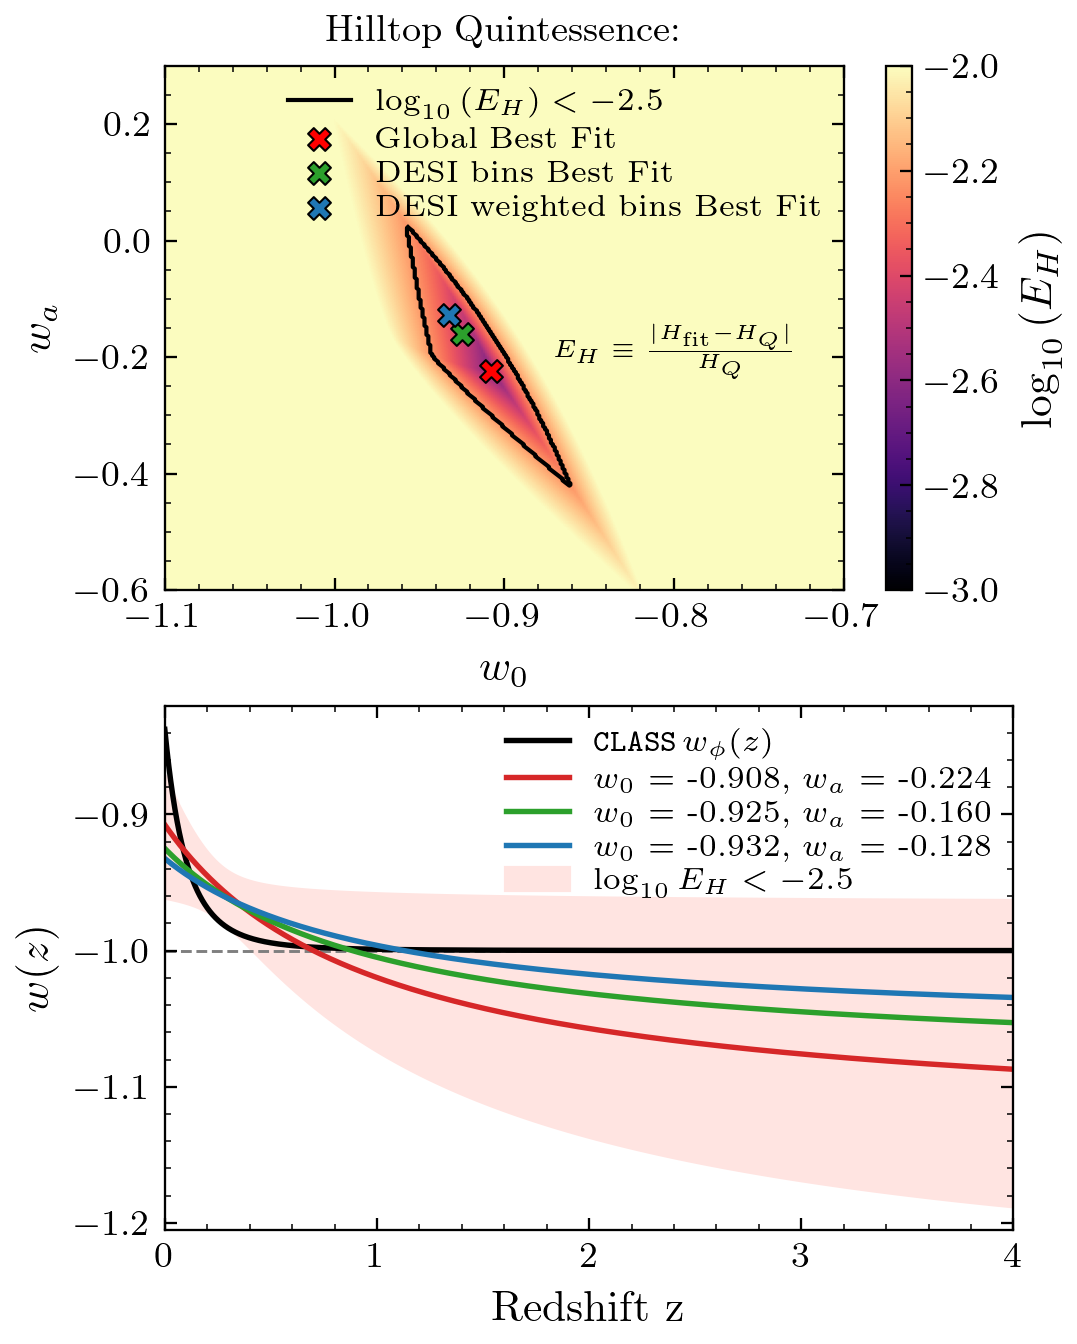

In [162]:
fig1=plt.figure(figsize=(4,5.5),dpi=300)
gs1 = GridSpec(24,23,figure=fig1)
ax = fig1.add_subplot(gs1[1:11,1:-1])
ax2 = fig1.add_subplot(gs1[13:-1,1:-1])
# plot the error heatmap with fixed vmin/vmax
im = ax.imshow(np.log10(Err_grid), origin='lower',
               extent=[w0_arr.min(), w0_arr.max(),
                       wa_arr.min(), wa_arr.max()],
               aspect='auto', cmap='magma',
               vmin=-3, vmax=-2)
plt.colorbar(im, ax=ax, label=r'$\log_{10}\left(E_H\right)$')

# overlay the threshold contour(s)
for i in range(len(boundaries)):
    contour=boundaries[i]
    if i==0:
        ax.plot(contour[:,0], contour[:,1], 'k-', lw=1.,zorder=1,label=r'$\log_{10}\left(E_H\right)<-2.5$')
    else:
        ax.plot(contour[:,0], contour[:,1], 'k-', lw=1.,zorder=1)
ax.set_xlim(-1.1,-0.7)
ax.set_ylim(-0.6,0.3)
ax.scatter(w0_bf, wa_bf,marker='X', c='red', s=30,edgecolor='k', linewidth=.5,zorder=1.5,label='Global Best Fit')
ax.scatter(w0_bf_binned, wa_bf_binned,marker='X', c='tab:green', s=30,edgecolor='k', linewidth=.5,zorder=1.5, label='DESI bins Best Fit') 
ax.scatter(w0_bf_binned_adj, wa_bf_binned_adj,marker='X', c='tab:blue', s=30,edgecolor='k', linewidth=.5,zorder=1.5,  label='DESI weighted bins Best Fit')
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_a$')
ax.text(-.87,-.2,r"$E_H\equiv\frac{|H_{\rm fit}-H_Q|}{H_Q}$", fontsize=6)
ax.legend()
ax2.fill_between(z_data,w_z_2psigma,w_z_2msigma,alpha=1,color='mistyrose',label=r'$\log_{10}E_H<-2.5$')
ax2.axhline(-1,ls='--',c='tab:gray',lw=0.7)
ax2.plot(baM['z'], w_phi, label=r'$\texttt{CLASS}\,w_\phi(z)$',c='k')
ax2.plot(z_data, wz_func(z_data, w0_bf,wa_bf) , '-', label=f' $w_0$ = {w0_bf:.3f}, $w_a$ = {wa_bf:.3f}',c='tab:red')
ax2.plot(z_data, wz_func(z_data, w0_bf_binned,wa_bf_binned) , '-', label=f' $w_0$ = {w0_bf_binned:.3f}, $w_a$ = {wa_bf_binned:.3f}',c='tab:green')
ax2.plot(z_data, wz_func(z_data, w0_bf_binned_adj,wa_bf_binned_adj) , '-', label=f'$w_0$ = {w0_bf_binned_adj:.3f}, $w_a$ = {wa_bf_binned_adj:.3f}',c='tab:blue')
ax2.set_xlabel('Redshift z')
ax2.set_ylabel(r'$w(z)$')
ax2.legend(loc='upper right')
ax2.set_xlim([0,4])
ax.set_title(r"Hilltop Quintessence:",fontsize=9)
plt.savefig("hilltop_example_fit.png")
plt.show()